In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
MIN = -3
MAX = 10
STEP = 1

n = np.arange(MIN, MAX, STEP)

In [21]:
# Unit step signal
def unit_step(delay: float):
    n = np.arange(MIN, MAX, STEP)
    return n > delay if delay else n > 0

In [61]:
# Delta diract signal
def delta_dirac(n, delay: float):
    threshold = 0 if delay is None else delay

    delta = np.zeros_like(n)
    zero = np.where(n == threshold)[0][0]
    delta[zero] = 1

    return delta

### Delta Diract signal (impulse)

__Continuous time__

$
\delta(t - x) = 
\begin{cases} 
\text{0, } &\quad\text{if t != x}\\
\text{1, } &\quad\text{if t = x}
\end{cases}
$

Expressed in terms of the unit step function (which is a _first derivative_):

$d(t) = \frac{du(t)}{dt}$

__Discrete time__

$
\delta[n - x] = 
\begin{cases}
\text{0, } &\quad\text{if n != x}\\
\text{1, } &\quad\text{if n = x}
\end{cases}
$

Expressed in terms of the unit step sequence (which is a _first difference_):

$
\delta[n] = u[n] - u[n - 1]
$

#### Sampling property

The diract delta signal or the impulse signal has the __sampling property__. This means that any function can be built as a summation of _delayed_ impulses:

$x[n]\delta[n] = x[0]\delta[n]$

In general:

$x[n]\delta[n - n_0] = x[n_0]\delta[n - n_0]$

It follows that:

$x[n] = \sum_{i=-\infty}^{\infty}{x[i]\delta[n - i]}$

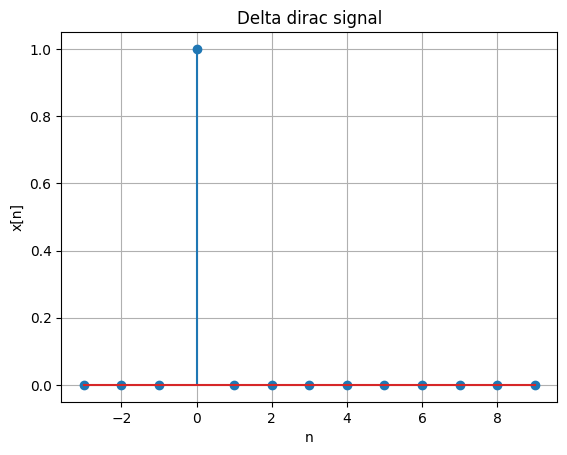

In [64]:
x_n = delta_dirac(n, 0)

_ = plt.title("Delta dirac signal")
_ = plt.stem(n, x_n)
_ = plt.xlabel("n")
_ = plt.ylabel("x[n]")
_ = plt.grid()

### Unit step signal

__Continuos time__

In the continous domain, the unit step function is not defined at $t=x$

$
u(t - x) = 
\begin{cases}
\text{0, } &\quad\text{if t < x}\\
\text{undefined, } &\quad\text{if t = x}\\
\text{1, } &\quad\text{if t > x}
\end{cases}
$

Can be expressed as the integral 

$u(t) = \int_{-\infty}^{t} \delta(\tau)d\tau$

__Discrete time__

In discrete domaion

$
u[n - x] = 
\begin{cases}
\text{0, } &\quad\text{if n < x}\\
\text{1, } &\quad\text{if n > x}
\end{cases}
$


We can also express the unit step in terms of the __dirac__ function as a sum of delayed impulses:

$u[n] = \sum_{k=-\infty}^{\infty}\delta[n - k]$



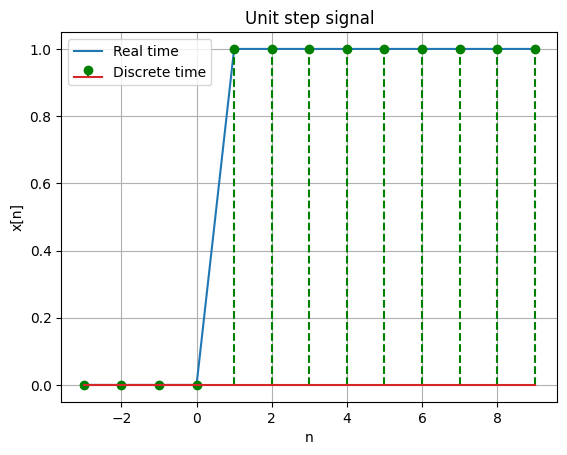

In [65]:
x_n = unit_step(0)

_ = plt.title("Unit step signal")
_ = plt.plot(n, x_n)
_ = plt.stem(n, x_n, "--g")
_ = plt.xlabel("n")
_ = plt.ylabel("x[n]")
_ = plt.grid()
_ = plt.legend(["Real time", "Discrete time"])

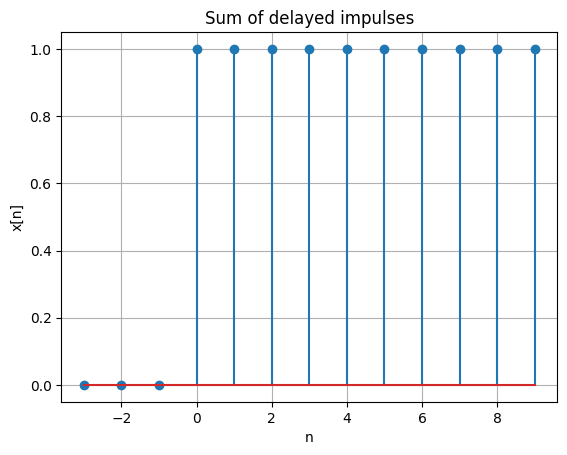

In [72]:
# Expressing the unit step as a sum of impulses

x_n = np.zeros_like(n)

for i in range(10):
    x_n += delta_dirac(n, i)


_ = plt.title("Sum of delayed impulses")
_ = plt.stem(n, x_n)
_ = plt.xlabel("n")
_ = plt.ylabel("x[n]")
_ = plt.grid()


## Introduction to systems

A system is a process that _maps_ the input signal into an output signal. It can be a _continous time_ or _discrete time_ one, but there are many ways to classify them:

__Interconnection__

A system can be chained along with other systems in the following way:

- Cascade: the order in which systems are chained doesn't matter, we got the _same output signal_
- Parallel: the _output signal_ is the _summation_ of the individual _system's output_. The order doesn't matter since the sum is _distributive_
- Feedback: the _output signal_ is fed back to the system's input

__Memoryless__

The output at any given time $t_i$ depends only on the input at that same time step $t_i$.

Examples:

- squarer signal: this is a memoryless system
  - $x[n] = x^2[n]$
  - $x(t) = x^2(t)$

- integrator: this is not memoryless since the output at any point in time $t_0$ is an accumulation of past values of the input
  - $y(t) = \int_{-\infty}^{t}x^2(t)dt$

__Invertibility__

Given the output of the system you can figure out what the input is or said in other words; the system's output is produced by an unique kind of input.

__Causality__

A system is causal when the output at any time depends only on inputs equal or prior to that time.

In other words: the system isn't influenced by future inputs.

Example: take a look at the _moving averages_

- $y[n] = \frac{1}{3}{x[n-1] + x[n] + x[n+1]}$; _not a causal system_, since the output depends of a future value of x which is $x[n+1]$
- $y[n] = \frac{1}{3}{x[n-2]+x[n-1]+x[n]}$; _a causal system_

__Stability__

BIBO stability (Bounded Input Bounded Output)

A system is stable if and only if, for every bounded input there's a bounded output.

### Properties of a system

__Time invariance__

If you take the input and __shift__ it in time, then the output also __shifts__ in time.

$x[n - n_0] => y[n - n_0]$

Example:

The _accumulator_ is a time invariant system

$y[n] = \sum_{k = -\infty}^{n}{x[k]}$

The following system is not time invariant:

$y(t) = sin(t)x(t)$

$y(t - t_0) = sin(t)x(t - t_0)$

__Linearity__

A system is said to be linear if it has the property that the _output_ of a _linear combination_ of inputs is the same _linear combination_ of the _individual_ inputs.

$y[n] = x_1[n] + x_2[n]$; A linear combination of inputs

$y[n] = y_1[n] + y_2[n]$; A linear combination of individual outputs